# Import Library

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from google.colab import files

# Load Dataset

In [1]:
from google.colab import files
import pandas as pd

# Meng-upload file
uploaded = files.upload()

Saving package_tourism.csv to package_tourism.csv
Saving tourism_rating.csv to tourism_rating.csv
Saving tourism_with_id.csv to tourism_with_id.csv
Saving user.csv to user.csv


In [2]:
# Memuat dataset yang di-upload
df_package_tourism = pd.read_csv('package_tourism.csv')
df_tourism_rating = pd.read_csv('tourism_rating.csv')
df_tourism_with_id = pd.read_csv('tourism_with_id.csv')
df_user = pd.read_csv('user.csv')

# Melihat beberapa baris pertama dari masing-masing dataset
print(df_package_tourism.head())
print(df_tourism_rating.head())
print(df_tourism_with_id.head())
print(df_user.head())

   Package     City         Place_Tourism1      Place_Tourism2  \
0        1  Jakarta      Pasar Tanah Abang        Taman Ayodya   
1        2  Jakarta      Pasar Tanah Abang  Pasar Taman Puring   
2        3  Jakarta  Perpustakaan Nasional               Monas   
3        4  Jakarta           Pulau Tidung      Pulau Bidadari   
4        5  Jakarta  Museum Satria Mandala       Museum Wayang   

          Place_Tourism3                                     Place_Tourism4  \
0         Museum Tekstil                                                NaN   
1   Pasar Petak Sembilan                                                NaN   
2        Masjid Istiqlal                                                NaN   
3             Pulau Pari                                      Pulau Pramuka   
4  Museum Bahari Jakarta  Museum Macan (Modern and Contemporary Art in N...   

  Place_Tourism5  
0            NaN  
1            NaN  
2            NaN  
3  Pulau Pelangi  
4            NaN  
   User_Id  Pl

# Menggabungkan Dataset

In [10]:
# Gabungkan df_tourism_with_id dengan df_tourism_rating berdasarkan 'Place_Id'
df_merged = pd.merge(df_tourism_with_id, df_tourism_rating, on='Place_Id', how='left')

# Gabungkan df_merged dengan df_user berdasarkan 'User_Id'
df_merged = pd.merge(df_merged, df_user, on='User_Id', how='left')

# Gabungkan df_merged dengan df_package_tourism berdasarkan 'City' (atau kolom yang relevan)
df_merged = pd.merge(df_merged, df_package_tourism, on='City', how='left')

# Menampilkan hasil penggabungan
print(df_merged.head())


   Place_Id        Place_Name  \
0         1  Monumen Nasional   
1         1  Monumen Nasional   
2         1  Monumen Nasional   
3         1  Monumen Nasional   
4         1  Monumen Nasional   

                                         Description Category     City  Price  \
0  Monumen Nasional atau yang populer disingkat d...   Budaya  Jakarta  20000   
1  Monumen Nasional atau yang populer disingkat d...   Budaya  Jakarta  20000   
2  Monumen Nasional atau yang populer disingkat d...   Budaya  Jakarta  20000   
3  Monumen Nasional atau yang populer disingkat d...   Budaya  Jakarta  20000   
4  Monumen Nasional atau yang populer disingkat d...   Budaya  Jakarta  20000   

   Rating  Time_Minutes                               Coordinate       Lat  \
0     4.6          15.0  {'lat': -6.1753924, 'lng': 106.8271528} -6.175392   
1     4.6          15.0  {'lat': -6.1753924, 'lng': 106.8271528} -6.175392   
2     4.6          15.0  {'lat': -6.1753924, 'lng': 106.8271528} -6.175392   
3 

# Exploratory Data Analysis (EDA)

### 1. Memahami Struktur Data

In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Place_Id        200000 non-null  int64  
 1   Place_Name      200000 non-null  object 
 2   Description     200000 non-null  object 
 3   Category        200000 non-null  object 
 4   City            200000 non-null  object 
 5   Price           200000 non-null  int64  
 6   Rating          200000 non-null  float64
 7   Time_Minutes    92560 non-null   float64
 8   Coordinate      200000 non-null  object 
 9   Lat             200000 non-null  float64
 10  Long            200000 non-null  float64
 11  Unnamed: 11     0 non-null       float64
 12  Unnamed: 12     200000 non-null  int64  
 13  User_Id         200000 non-null  int64  
 14  Place_Ratings   200000 non-null  int64  
 15  Location        200000 non-null  object 
 16  Age             200000 non-null  int64  
 17  Package   

Menghapus fitur yang kurang relevan

In [28]:
# Memastikan kolom-kolom yang sudah dihapus
df_merged = df_merged.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Place_Tourism4', 'Place_Tourism5'])

# Memeriksa kolom setelah penghapusan
print(df_merged.columns)


Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'User_Id',
       'Place_Ratings', 'Location', 'Age', 'Package', 'Place_Tourism1',
       'Place_Tourism2', 'Place_Tourism3'],
      dtype='object')


### 2. Menangani Data yang Hilang, dan duplicated

In [24]:
df_merged.isnull().sum()


,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,107440
Coordinate,0
Lat,0


In [26]:
print('Jumlah data duplicated: ', df_merged.duplicated().sum())

Jumlah data duplicated:  1580


### 3. Analisis Distribusi dan Korelasi

### Histogram
Histogram digunakan untuk melihat distribusi data numerik.

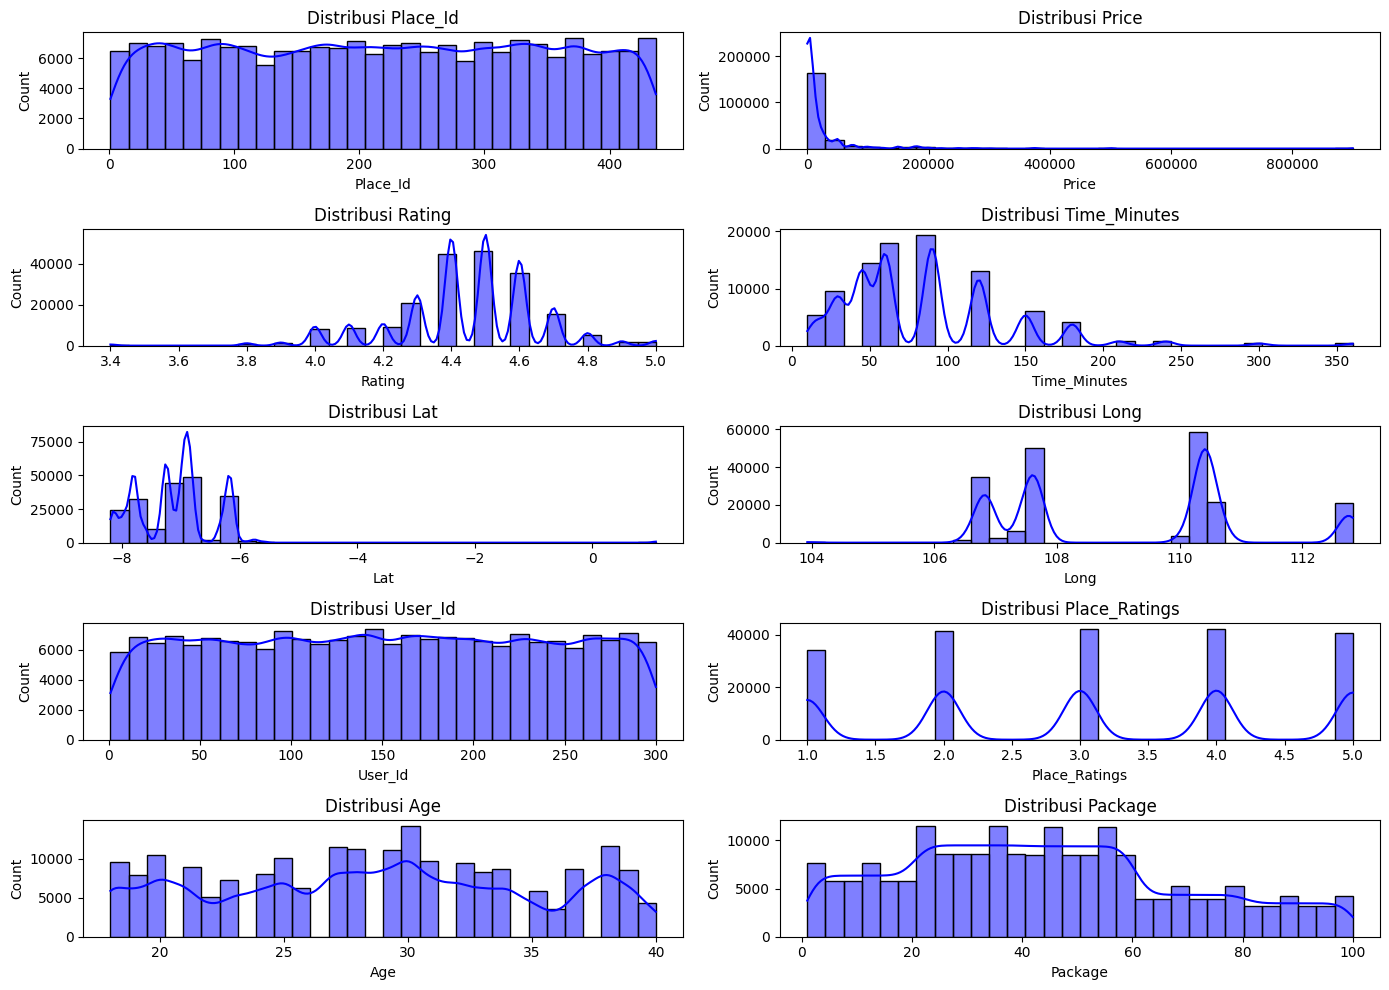

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = df_merged.select_dtypes(include=[np.number]).columns
num_plots = len(num_features)
num_rows = int(np.ceil(num_plots / 2))  # Calculate the number of rows needed

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features, 1):
    plt.subplot(num_rows, 2, i)  # Adjust subplot layout dynamically
    sns.histplot(df_merged[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Pairplot untuk fitur numerik

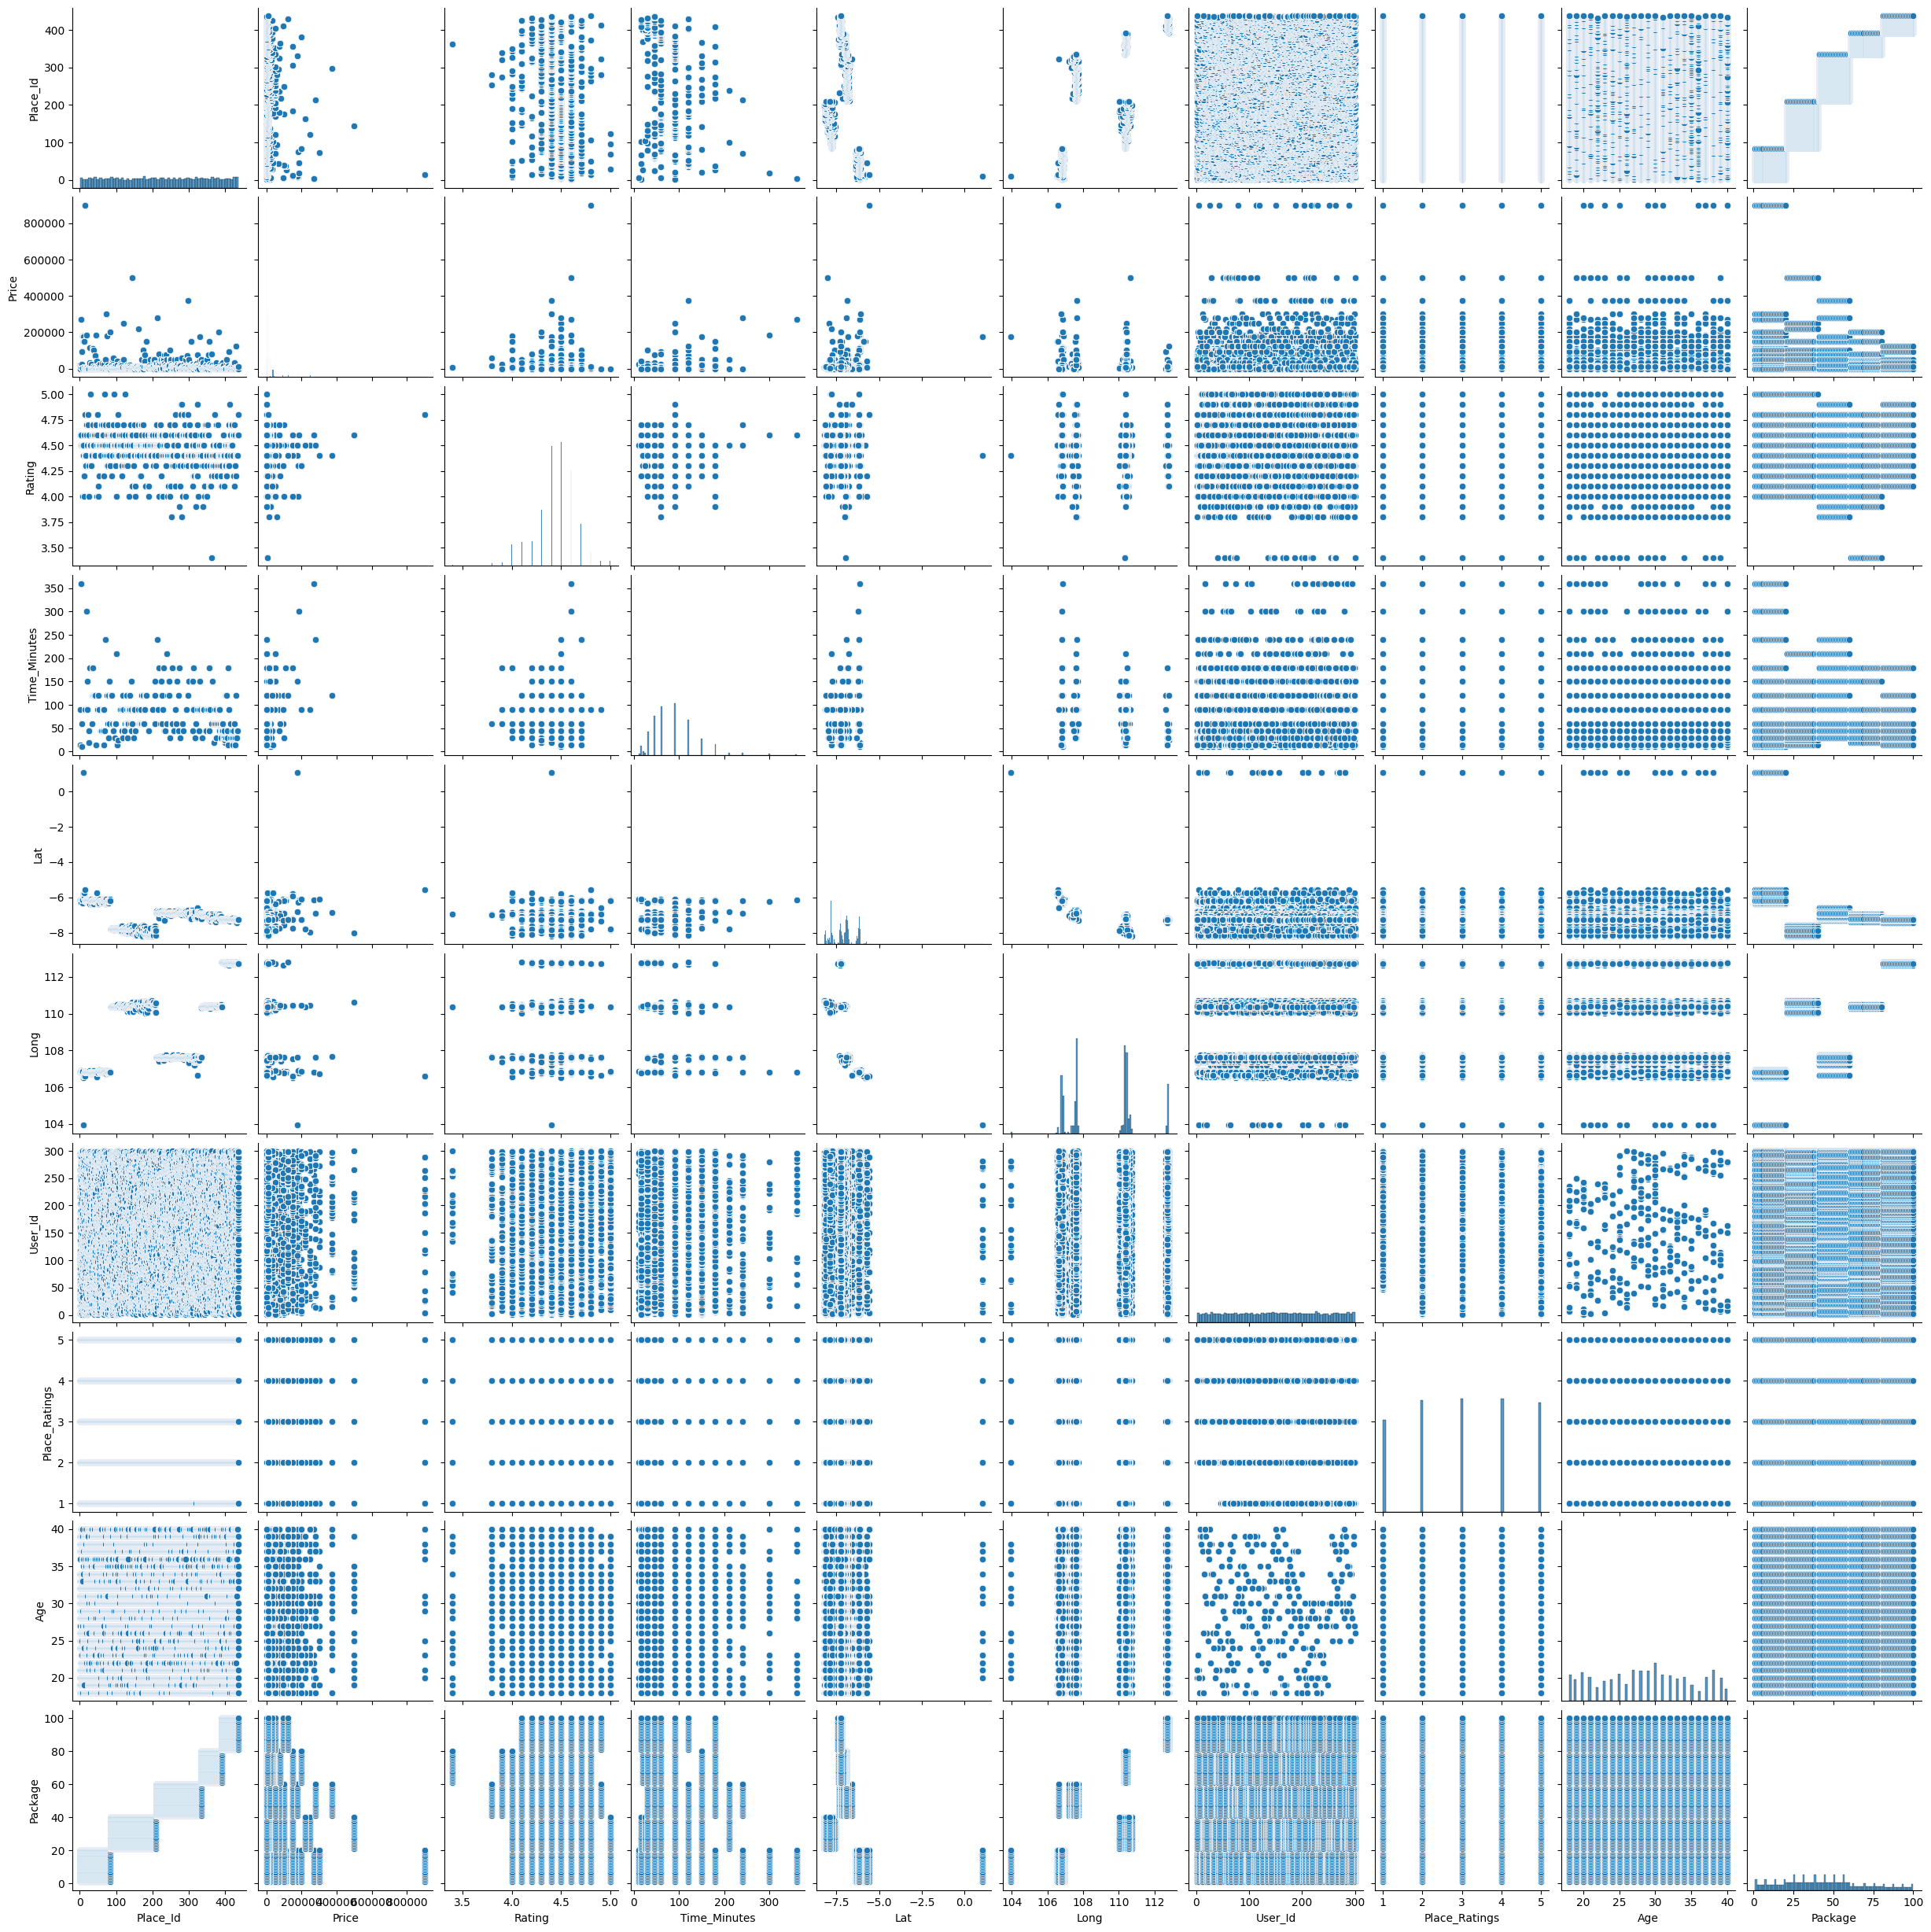

In [37]:
num_features_index = df_merged.select_dtypes(include=[np.number])
sns.pairplot(num_features_index)
plt.show()

Statistik Deskriptif

In [31]:
# Menampilkan statistik deskriptif
print(df_merged[numerical_cols].describe())


            Place_Id          Price         Rating  Time_Minutes  \
count  200000.000000  200000.000000  200000.000000  92560.000000   
mean      219.416400   23725.500000       4.445700     83.291919   
std       126.222339   62630.575302       0.207335     51.948855   
min         1.000000       0.000000       3.400000     10.000000   
25%       108.750000       0.000000       4.400000     45.000000   
50%       220.000000    5000.000000       4.500000     60.000000   
75%       329.000000   20000.000000       4.600000    120.000000   
max       437.000000  900000.000000       5.000000    360.000000   

                 Lat           Long        User_Id  Place_Ratings  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -7.098697     109.160356     151.292700       3.066500   
std         0.707541       1.957997      86.133282       1.379887   
min        -8.197894     103.931398       1.000000       1.000000   
25%        -7.747846     107.577763      7

Korelasi Antar Variabel

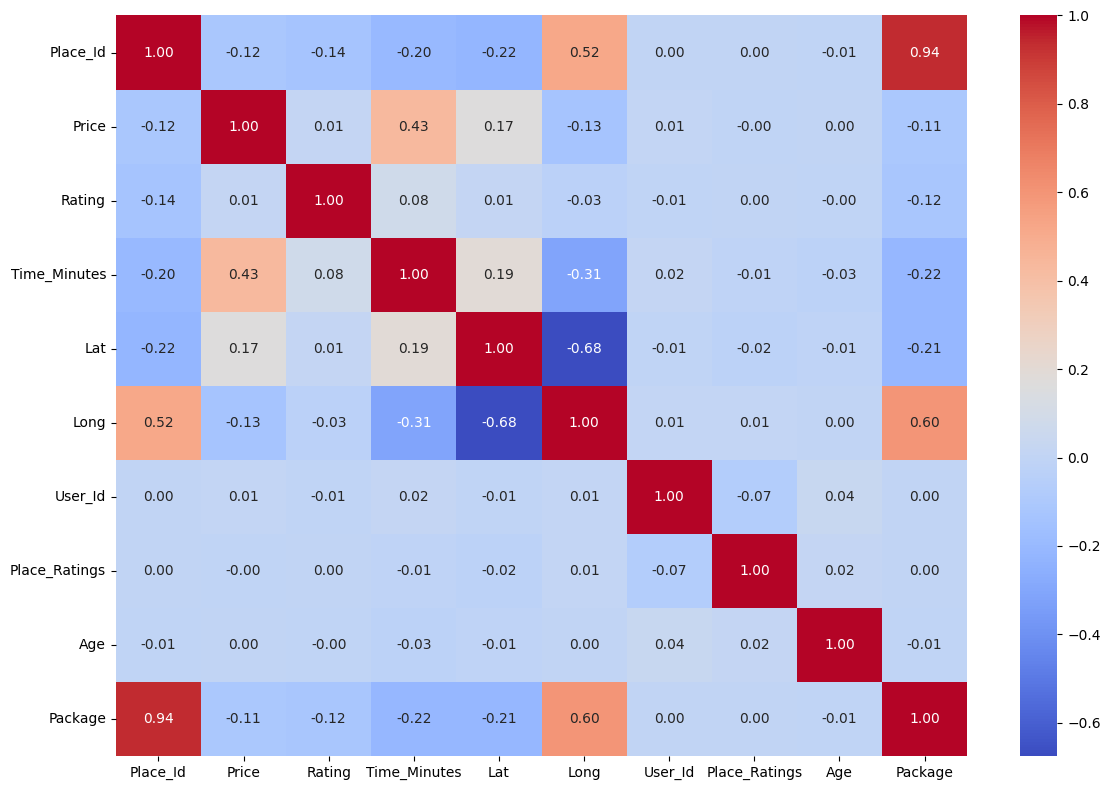

In [40]:
# Membuat heatmap untuk korelasi antar kolom numerik
correlation_matrix = df_merged[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()

Visualisasi Fitur Kategorikal

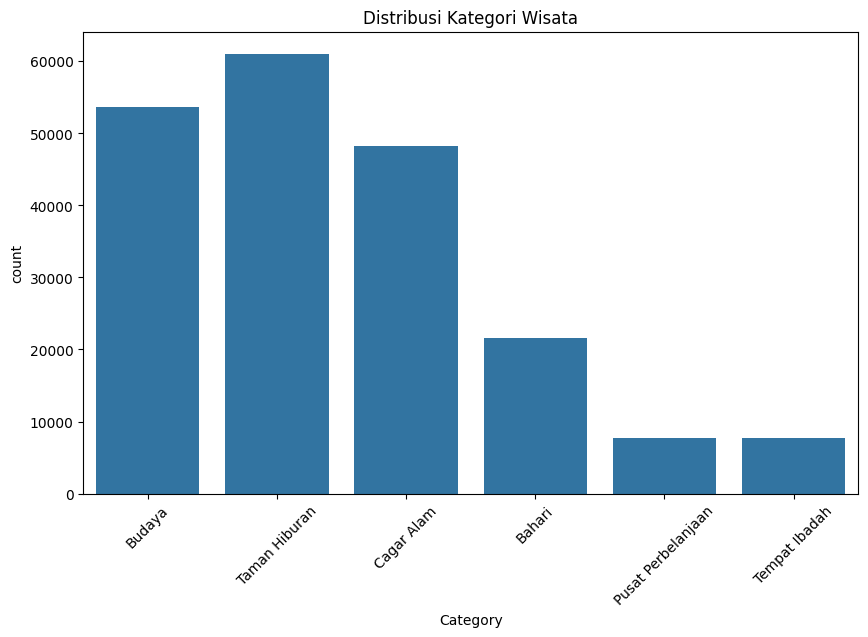

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x='Category')
plt.title('Distribusi Kategori Wisata')
plt.xticks(rotation=45)
plt.show()

Analisis Distribusi dan Korelasi untuk Kolom Kategorikal

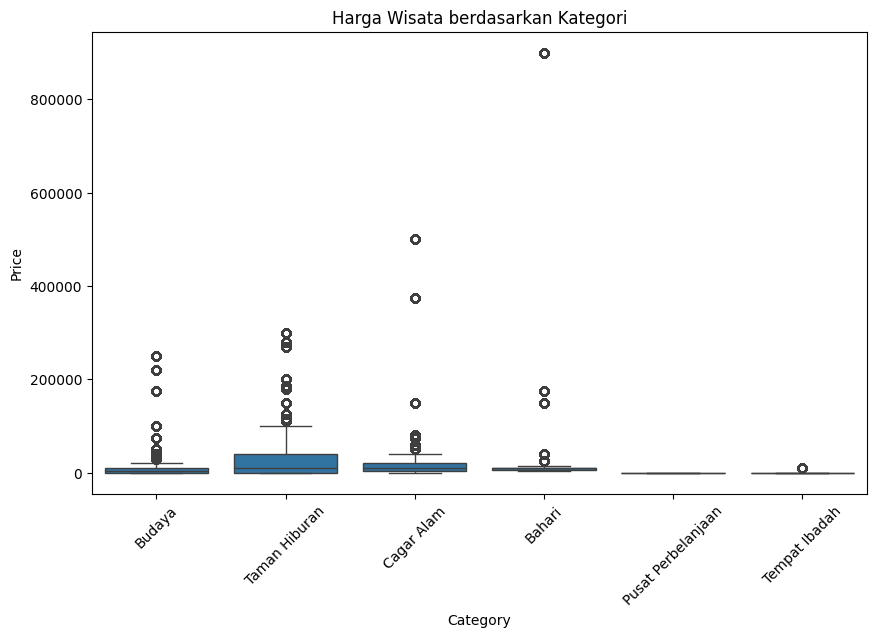

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=df_merged)
plt.title('Harga Wisata berdasarkan Kategori')
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

### 1. Menghapus Data Duplikat

In [44]:
print("Jumlah data duplikat sebelum dihapus:", df_merged.duplicated().sum())
df_merged.drop_duplicates(inplace=True)
print("Jumlah data setelah menghapus duplikat:", df_merged.shape)

Jumlah data duplikat sebelum dihapus: 1580
Jumlah data setelah menghapus duplikat: (198420, 19)


### 2. Deteksi dan penanganan Outlier

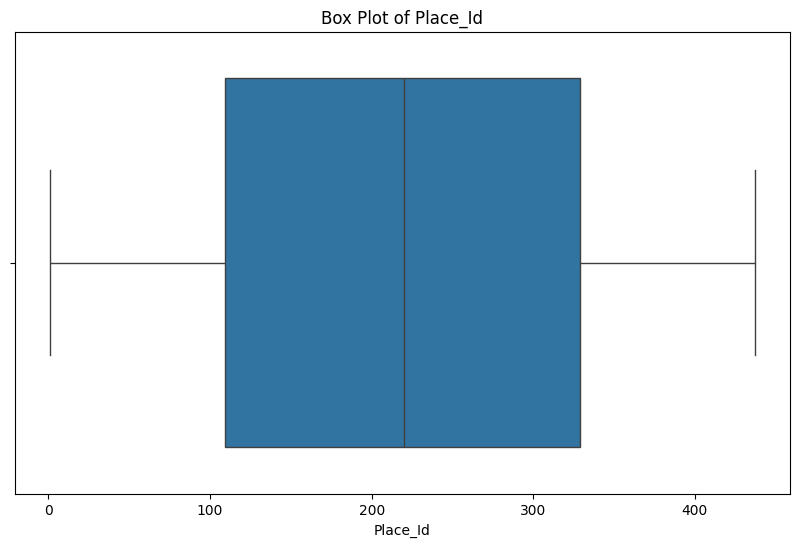

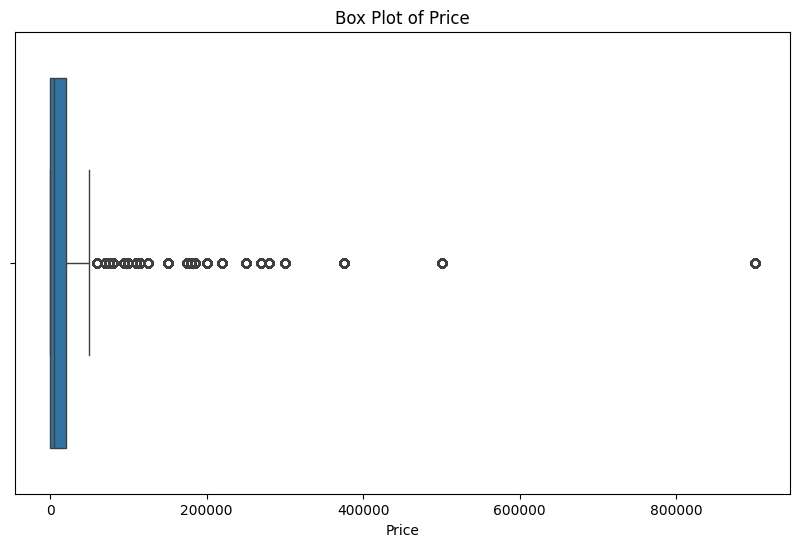

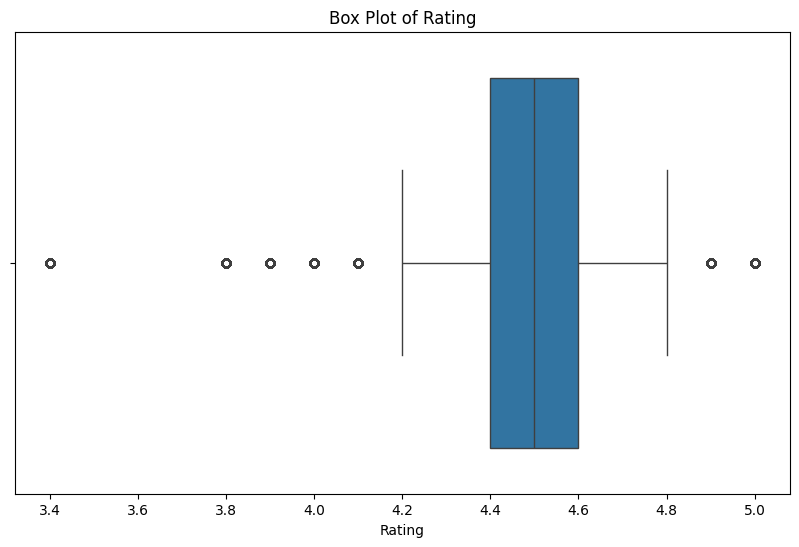

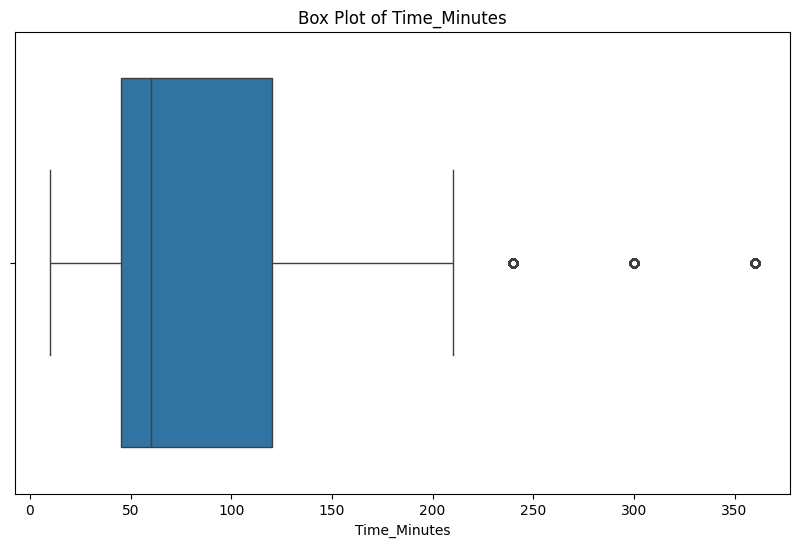

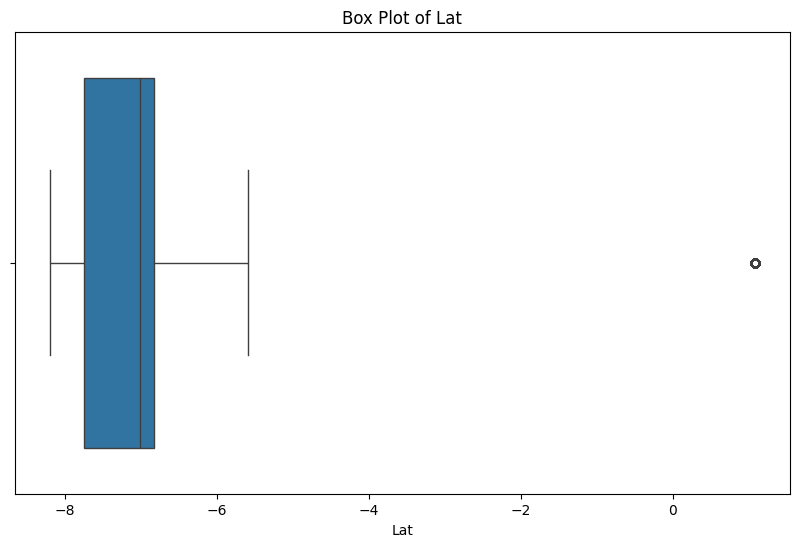

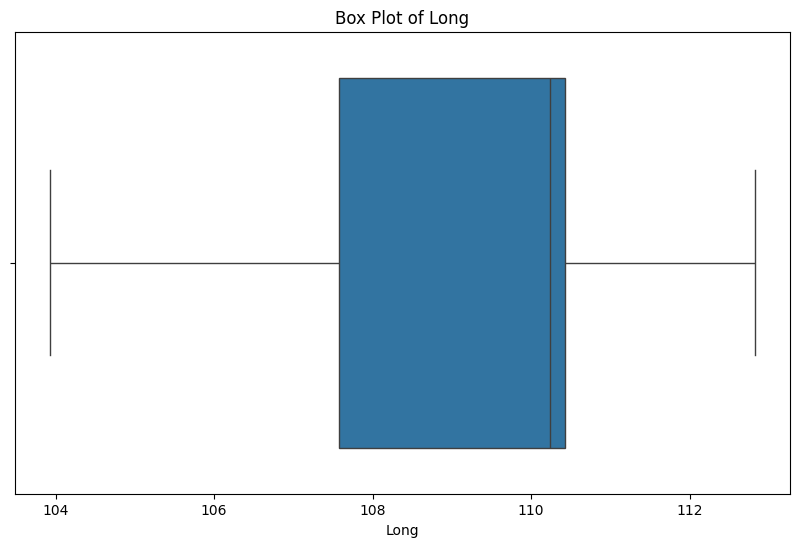

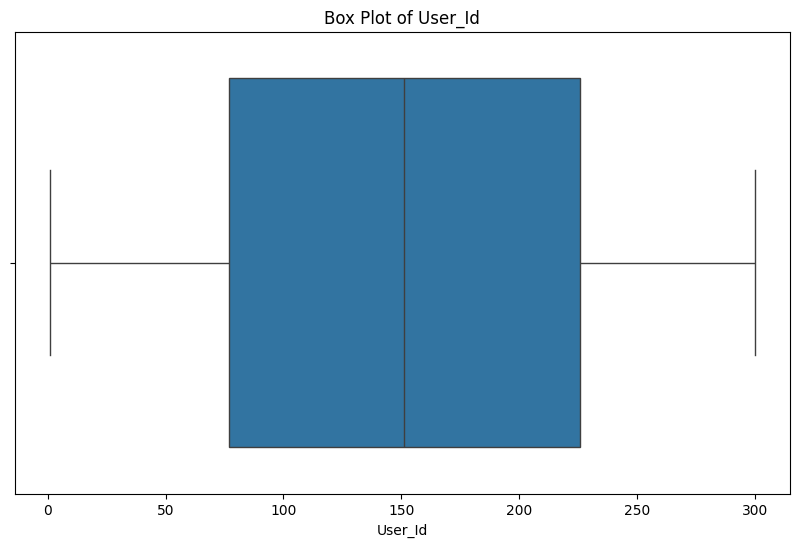

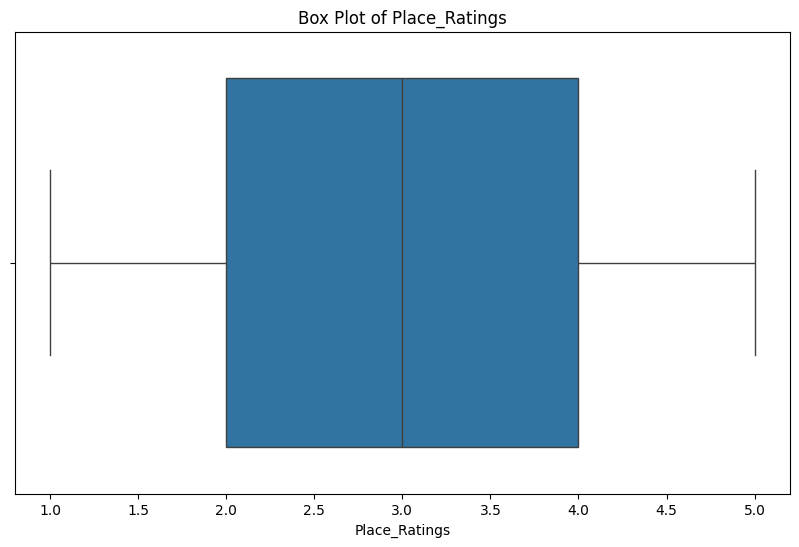

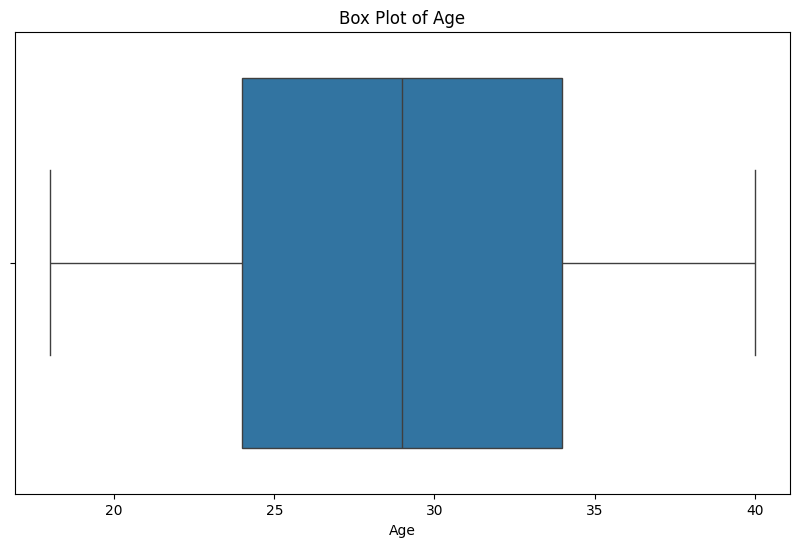

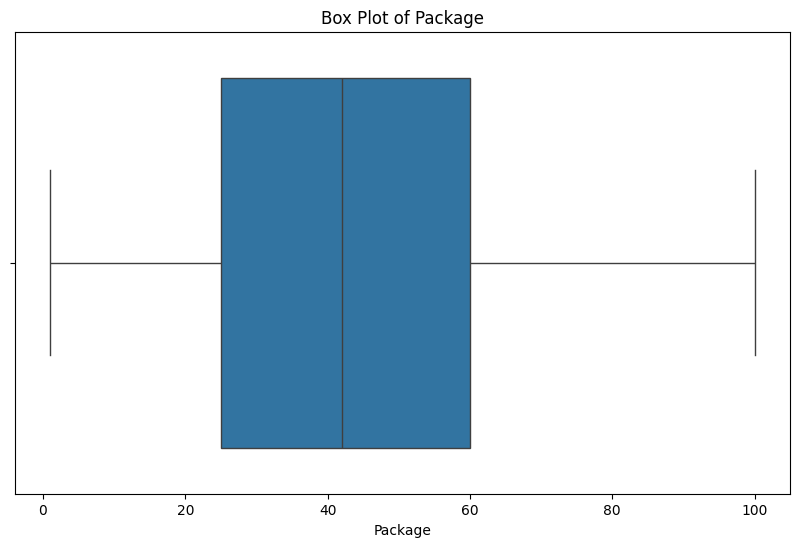

In [46]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_merged[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [52]:
# Define categorical features
cat_features = df_merged.select_dtypes(include=['object']).columns

Q1 = df_merged[num_features].quantile(0.25)
Q3 = df_merged[num_features].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df_merged[num_features] < (Q1 - 1.5 * IQR)) | (df_merged[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_merged_filtered_numeric = df_merged.loc[condition, num_features]

# Menggabungkan kembali dengan kolom kategorikal
df_merged = pd.concat([df_merged_filtered_numeric, df_merged.loc[condition, cat_features]], axis=1)

### Setelah penanganan outlier menggunakan IQR

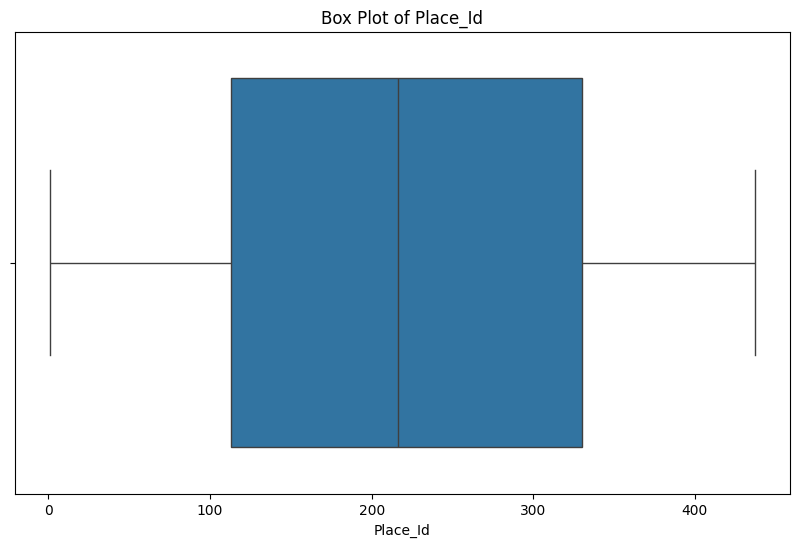

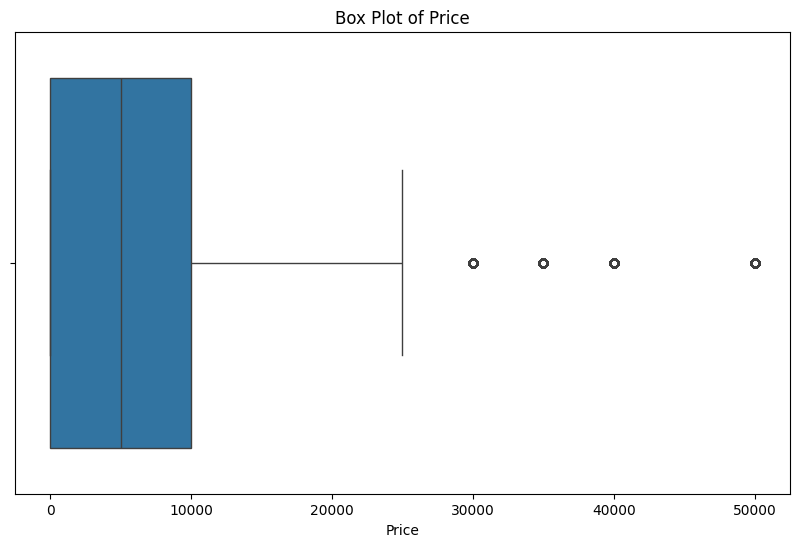

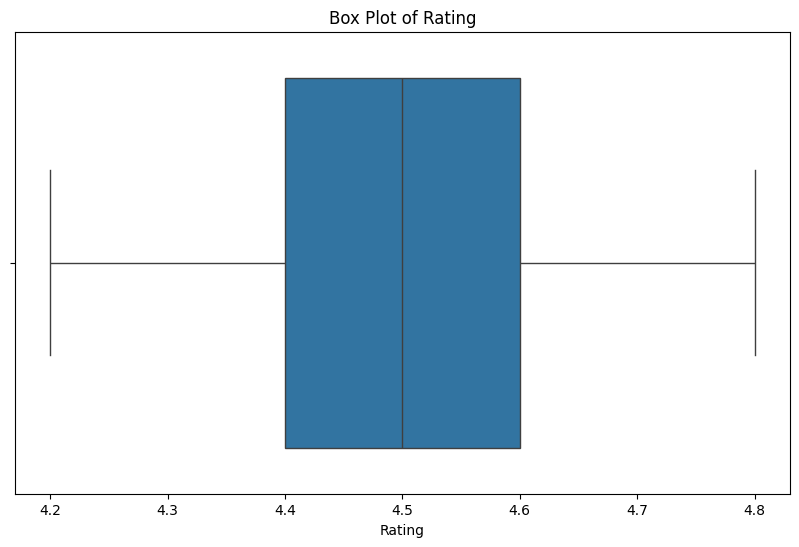

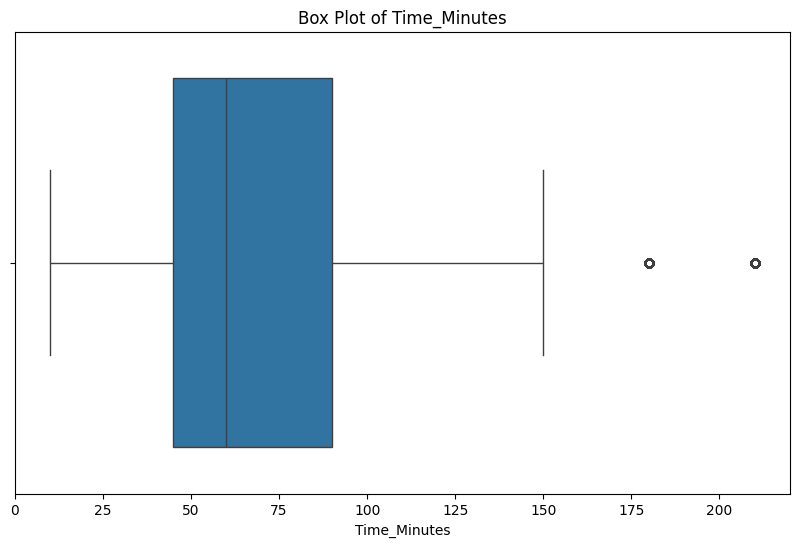

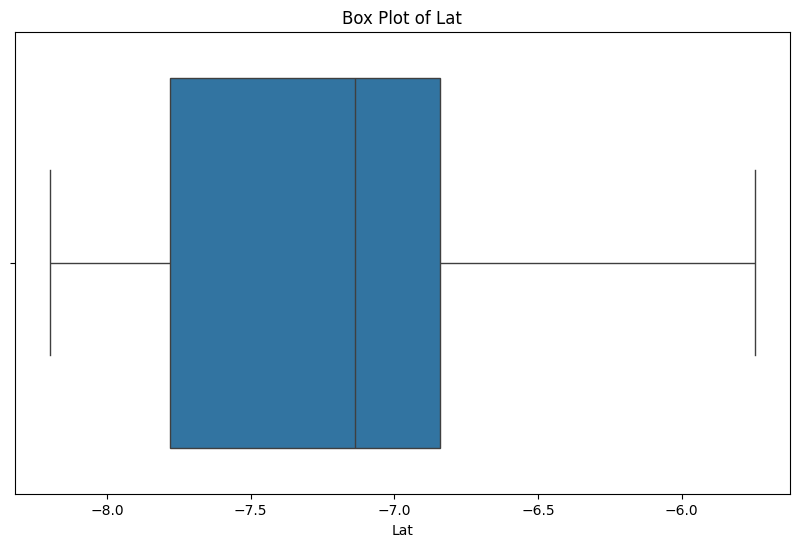

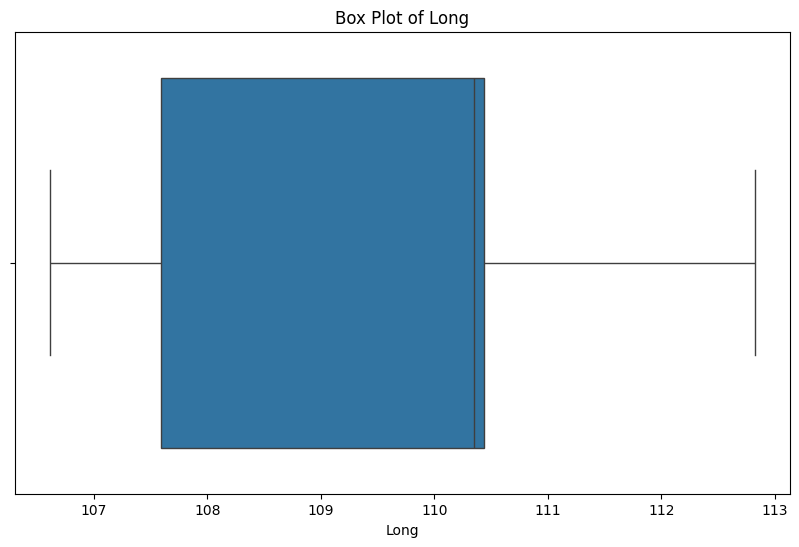

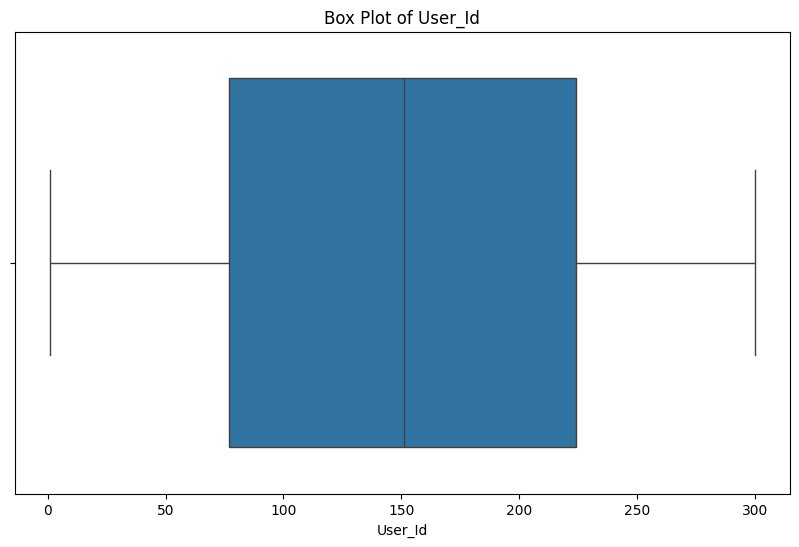

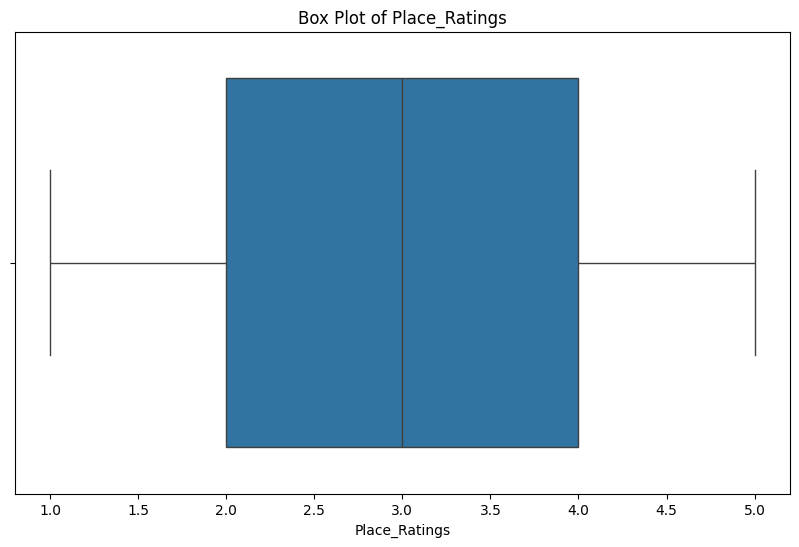

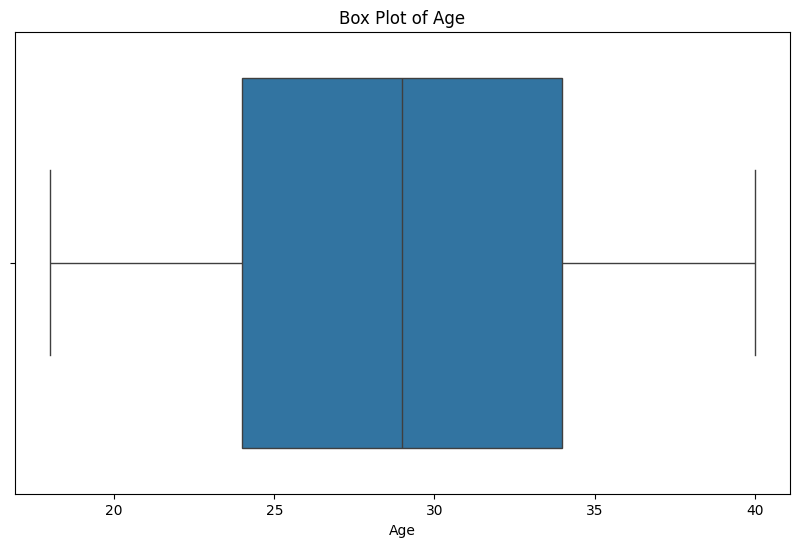

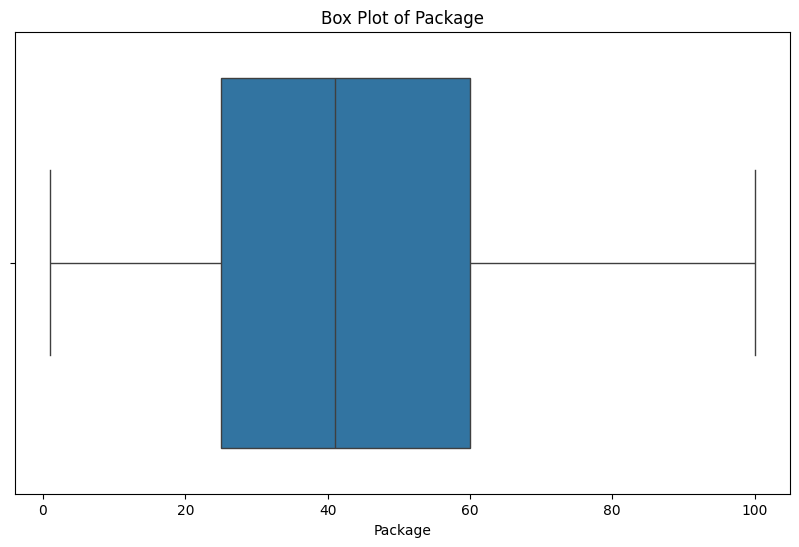

In [53]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_merged[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

###3. Encoding Data Kategorikal

In [56]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

df_labeled = df_merged.copy() # Replace df with df_merged
label_encoder = LabelEncoder()

label_encoders = {}

for col in cat_features:
    le = LabelEncoder()
    df_labeled[col] = le.fit_transform(df_merged[col]) # Replace df with df_merged
    label_encoders[col] = le

df_labeled.head()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,User_Id,Place_Ratings,Age,Package,Place_Name,Description,Category,City,Coordinate,Location,Place_Tourism1,Place_Tourism2,Place_Tourism3
0,1,20000,4.6,15.0,-6.175392,106.827153,36,4,20,1,150,154,1,1,22,22,61,72,49
1,1,20000,4.6,15.0,-6.175392,106.827153,36,4,20,2,150,154,1,1,22,22,61,63,54
2,1,20000,4.6,15.0,-6.175392,106.827153,36,4,20,3,150,154,1,1,22,22,62,37,36
3,1,20000,4.6,15.0,-6.175392,106.827153,36,4,20,4,150,154,1,1,22,22,63,66,60
4,1,20000,4.6,15.0,-6.175392,106.827153,36,4,20,5,150,154,1,1,22,22,50,52,41


### 4. Normalisasi Fitur

In [58]:
# Normalisasi dengan Min-Max
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

df_normalized = df_labeled.copy()

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized), columns=df_labeled.columns) # Use df_labeled.columns instead of df.columns
df_normalized.head()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,User_Id,Place_Ratings,Age,Package,Place_Name,Description,Category,City,Coordinate,Location,Place_Tourism1,Place_Tourism2,Place_Tourism3
0,0.0,0.4,0.666667,0.025,0.82486,0.03439,0.117057,0.75,0.090909,0.000000,0.432277,0.443804,0.2,0.25,0.063401,0.814815,0.693182,0.782609,0.538462
1,0.0,0.4,0.666667,0.025,0.82486,0.03439,0.117057,0.75,0.090909,0.010101,0.432277,0.443804,0.2,0.25,0.063401,0.814815,0.693182,0.684783,0.593407
2,0.0,0.4,0.666667,0.025,0.82486,0.03439,0.117057,0.75,0.090909,0.020202,0.432277,0.443804,0.2,0.25,0.063401,0.814815,0.704545,0.402174,0.395604
3,0.0,0.4,0.666667,0.025,0.82486,0.03439,0.117057,0.75,0.090909,0.030303,0.432277,0.443804,0.2,0.25,0.063401,0.814815,0.715909,0.717391,0.659341
4,0.0,0.4,0.666667,0.025,0.82486,0.03439,0.117057,0.75,0.090909,0.040404,0.432277,0.443804,0.2,0.25,0.063401,0.814815,0.568182,0.565217,0.450549


## Menyimpan dataset yang telah diproses

In [59]:
# Menyimpan dataset yang telah diproses
df_normalized.to_csv('processed_tourism_data.csv', index=False)